In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
df_test = pd.read_csv("MSFT_test.csv")
df_validation = pd.read_csv("MSFT_validation.csv")
print(df_test)
print(df_validation)

            Date        Open        High         Low       Close   Adj Close  \
0     2007-07-26   30.240000   30.530001   29.510000   29.980000   21.859865   
1     2007-07-27   29.930000   30.000000   29.360001   29.389999   21.429667   
2     2007-07-30   29.410000   29.490000   28.950001   29.400000   21.436956   
3     2007-07-31   29.709999   29.719999   28.980000   28.990000   21.138012   
4     2007-08-01   28.950001   29.549999   28.820000   29.299999   21.364044   
...          ...         ...         ...         ...         ...         ...   
3379  2020-12-24  221.419998  223.610001  221.199997  222.750000  218.847733   
3380  2020-12-28  224.449997  226.029999  223.020004  224.960007  221.019012   
3381  2020-12-29  226.309998  227.179993  223.580002  224.149994  220.223206   
3382  2020-12-30  225.229996  225.630005  221.470001  221.679993  217.796478   
3383  2020-12-31  221.699997  223.000000  219.679993  222.419998  218.523514   

        Volume  
0     87025300  
1    

In [5]:
print("test dates")
print("Minimum date value : {}".format(df_test['Date'].min()))
print("Maximum date value : {}".format(df_test['Date'].max()))
print("validation dates")
print("Minimum date value : {}".format(df_validation['Date'].min()))
print("Maximum date value : {}".format(df_validation['Date'].max()))


test dates
Minimum date value : 2007-07-26
Maximum date value : 2020-12-31
validation dates
Minimum date value : 2021-01-04
Maximum date value : 2022-11-25


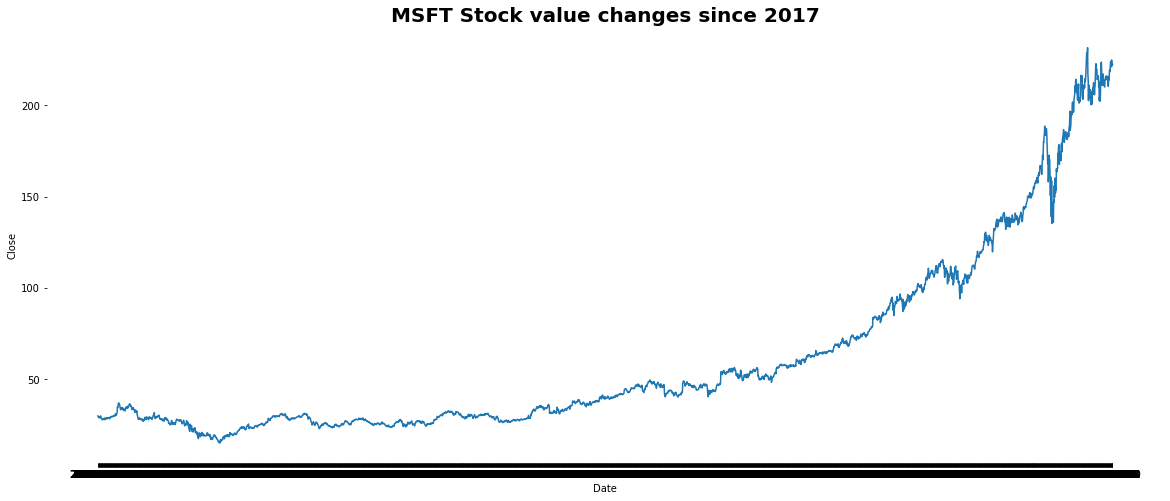

In [23]:
fig=plt.figure(figsize=(20,8))
#ax=sns.lineplot(data=df_test, x='Date',y='Open')
ax=sns.lineplot(data=df_test, x='Date',y='Close');
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("MSFT Stock value changes since 2017", size=20, weight='bold')
plt.show()

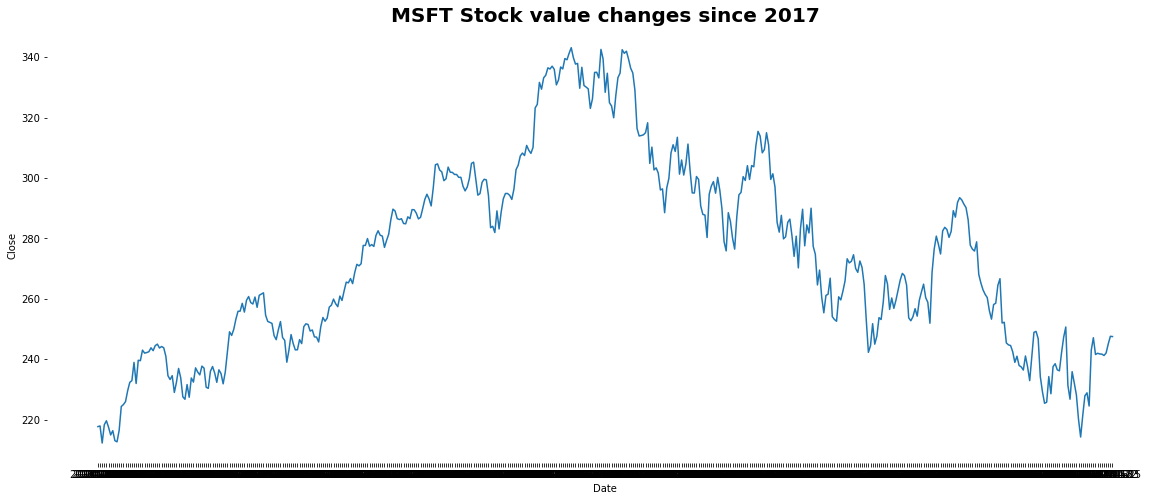

In [22]:
fig=plt.figure(figsize=(20,8))
#ax=sns.lineplot(data=df_validation, x='Date',y='Open')
ax=sns.lineplot(data=df_validation, x='Date',y='Close');
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("MSFT Stock value changes since 2017", size=20, weight='bold')
plt.show()

In [18]:
X=df_test[['Volume','Open']]
y=df_test['Close']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

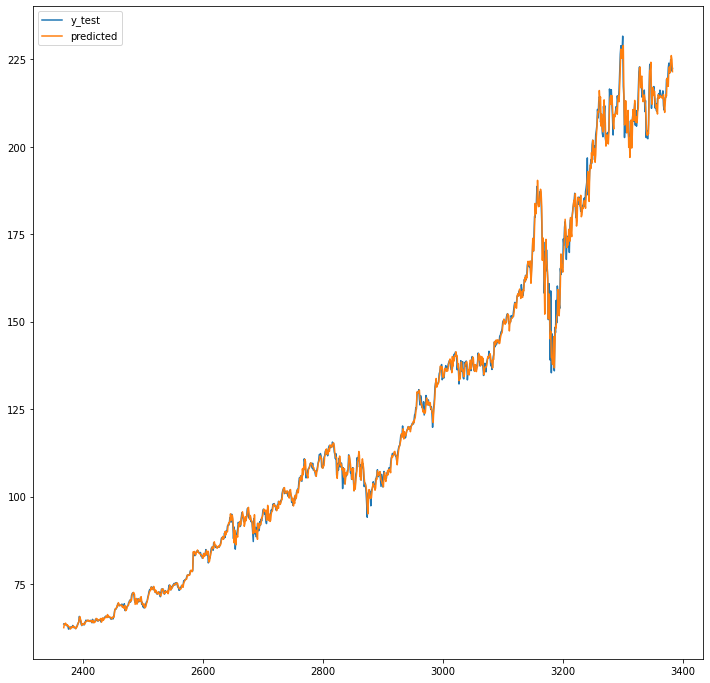

In [20]:
fig=plt.figure(figsize=(12,12))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])